# Forecasting with Confidence with KNN-TSPI

In this notebook we show how one can access forecasting intervals with KNN-TSPI. 

We highly recommend to read the [Getting Started with KNN-TSPI](./getting-started.ipynb) notebook before diving into this one, since we will skip the explanation of some steps that we already did in the aforementioned.


The time series chosen was the `airpassengers` - Monthly airline passengers. The classic Box & Jenkins airline data,monthly totals of international airline passengers, 1949 to 1960.

In [ ]:
!pip install matplotlib pmdarima

In [1]:
from knn_tspi import KNeighborsTSPI
import matplotlib.pyplot as plt
from pmdarima.datasets import load_airpassengers

In [2]:
data = load_airpassengers()
data

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

In [3]:
k = 3
len_query = 12
h = 24

knn = KNeighborsTSPI(k=k, len_query=len_query)
knn

KNeighborsTSPI(k=3, len_query=12, weights="uniform")

In [4]:
knn.fit(data)

Instead of calling the `predict` method, we will call the `predict_interval` which applies a bootstrap algorithm on the model residuals to estimate the confidence intervals. It is the same method used by the ETS model from the R [forecast](https://www.r-project.org/nosvn/pandoc/forecast.html) package.

The output is a dictionary containing the keys `low_95`, `low_80`, `mean`, `high_80`, `high_95` which are the bootstraped predictions quantiles along with the mean which is exactly the same as the output from `predict`.

In [5]:
y = knn.predict_interval(h=h)
y

{'low_95': array([449.36775189, 431.16480366, 508.62114756, 503.19271639,
        517.11085306, 592.21311318, 646.23389642, 630.88787054,
        562.12305288, 497.58504505, 444.93536458, 494.35783587,
        511.07294293, 492.96353216, 562.25438691, 559.41777368,
        570.77819947, 637.5846023 , 681.20960428, 682.39140764,
        612.91256343, 553.58783034, 507.03978751, 549.83403393]),
 'low_80': array([451.14198916, 434.03596093, 512.05997229, 505.38988367,
        520.36423301, 595.45873854, 650.30886094, 634.09184884,
        564.82346487, 500.45620232, 446.50213074, 498.02146327,
        512.39502085, 496.35716781, 564.34363144, 562.12931823,
        572.4883386 , 640.12428992, 684.50500998, 685.99258982,
        614.51699506, 555.53302283, 510.40983847, 551.65859717]),
 'mean': array([461.23057595, 442.84218294, 520.48397162, 516.60166165,
        528.78823234, 603.00688913, 656.48245899, 641.80607209,
        572.37161546, 509.26242434, 455.30835276, 505.56961385,
        

Here, we show how to visualize those confidence intervals.

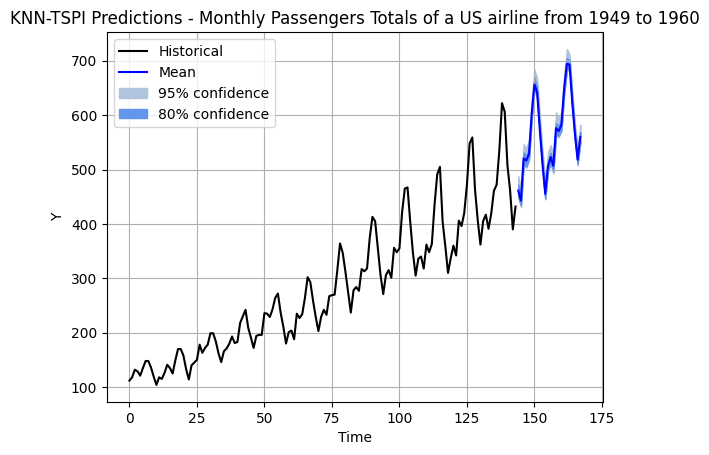

In [9]:
rng = range(len(data), len(data) + h)
plt.title("KNN-TSPI Predictions - Monthly Passengers Totals of a US airline from 1949 to 1960")
plt.plot(data, color="black", label="Historical")
plt.plot(rng, y["mean"], color="blue", label="Mean")
plt.fill_between(
    rng,
    y["low_80"],
    y["low_95"],
    color="lightsteelblue",
)
plt.fill_between(
    rng,
    y["high_80"],
    y["high_95"],
    color="lightsteelblue",
    label="95% confidence",
)
plt.fill_between(
    rng, y["low_80"], y["high_80"], color="cornflowerblue", label="80% confidence"
)
plt.grid()
plt.xlabel("Time")
plt.ylabel("Y")
plt.legend(loc="upper left")
plt.show()